# CH07 SVM

## EX 7.1

In [1]:
from scipy import optimize
fun = lambda x: ((x[0])**2 + (x[1])**2)/2
cons = ({'type': 'ineq', 'fun': lambda x: 3*x[0] + 3 * x[1] + x[2] - 1},
        {'type': 'ineq', 'fun': lambda x: 4*x[0] + 3 * x[1] + x[2] - 1},
        {'type': 'ineq', 'fun': lambda x: -x[0] - x[1] - x[2] - 1})
res = optimize.minimize(fun, (1, 1, 1), method='SLSQP', constraints=cons)
print(res)

     fun: 0.2500000000000011
     jac: array([0.50000001, 0.50000001, 0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 10
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 0.5,  0.5, -2. ])


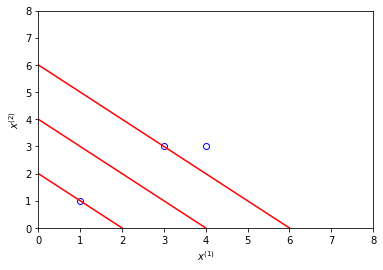

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy


data = np.array([[3,3],
                 [4,3],
                 [1,1]])
figure, ax = plt.subplots()
ax.scatter(data[:, 0],data[:, 1],marker='o',edgecolors="b",c="w")

(x1,x2) = sympy.symbols("x1,x2")

w = res["x"]
x_1 = np.array([x1, 0, 1])
x_2 = np.array([0, x2, 1])
y = np.array([-1,0,1])
lines = list()
for p in zip([(sympy.solve(e)[0],0) for e in np.sum(w*x_1)+y],
             [(0,sympy.solve(e)[0]) for e in np.sum(w*x_2)+y]):
    lines.append(p)
# lines [H1, H, H2]

for line_xs, line_ys in lines:
    ax.add_line(plt.Line2D(line_xs, line_ys, color ="red"))

plt.xlim([0,8])
plt.ylim([0,8])
plt.xlabel("$x^{(1)}$")
plt.ylabel("$x^{(2)}$")
plt.show()

## EX7.2

In [3]:
data = np.array([[3,3],
                 [4,3],
                 [1,1]])
label = np.array([1,1,-1])

from scipy import optimize
fun = lambda alpha: 4*(alpha[0])**2 + 13/2*(alpha[1])**2+10*alpha[0]*alpha[1]-2*alpha[0]-2*alpha[1]
cons = ({'type': 'ineq', 'fun': lambda alpha: alpha[0]},
        {'type': 'ineq', 'fun': lambda alpha: alpha[1]})
bnds = ((0, None), (0, None))
res = optimize.minimize(fun, np.ones(2), method='SLSQP',bounds=bnds)
print(res)
alpha = res["x"]
alpha = np.append(alpha, alpha[0]+alpha[1])
w = np.sum((alpha*label).reshape(-1,1)*data, axis=0)
j = np.argmax(alpha)
b = label[j] - np.sum(alpha*label*np.dot(data,data[j,:]),axis=0)
#  0和2都OK，因为都为0.5 > 0
# b = label[0] - np.sum(alpha*label*np.dot(data,data[0,:]),axis=0)
# b = label[2] - np.sum(alpha*label*np.dot(data,data[2,:]),axis=0)

print(w,b)

     fun: -0.24999999999999978
     jac: array([1.86264515e-09, 5.00000024e-01])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([2.49999993e-01, 3.55390643e-17])
[0.49999999 0.49999999] -1.999999970119951


## Loss

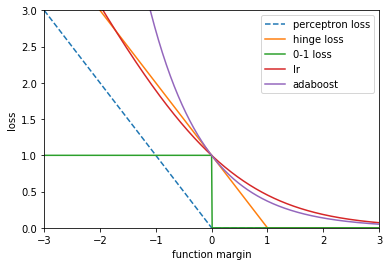

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3,3,601)
# perceptron loss
y1 = list(map(lambda x: max(0, -x), x))
# hinge loss
y2 = list(map(lambda x: max(0,1-x), x))
# 0-1 loss
y3 = list(map(lambda x:1 if x <= 0 else 0, x))
# lr loss
y4 = list(map(lambda x:np.log2(1+np.exp(-x)), x))
# adaboost
y5 = list(map(lambda x:np.exp(-x), x))
plt.plot(x,y1,'--',label='perceptron loss')
plt.plot(x,y2, '-', label='hinge loss' )
plt.plot(x,y3, '-', label='0-1 loss')
plt.plot(x,y4, '-', label='lr')
plt.plot(x,y5, '-', label='adaboost')

plt.legend()
plt.xlim(-3,3)
plt.ylim(0,3)
plt.xlabel("function margin")
plt.ylabel("loss")
# plt.savefig("test.png")
plt.show()